In [18]:
import numpy as np
import scipy as sc
import sympy as sp
from matplotlib import pyplot as plt

# -------------- Lane-Emden

### Numerical vs Analytical Solution for n = 0,1,5

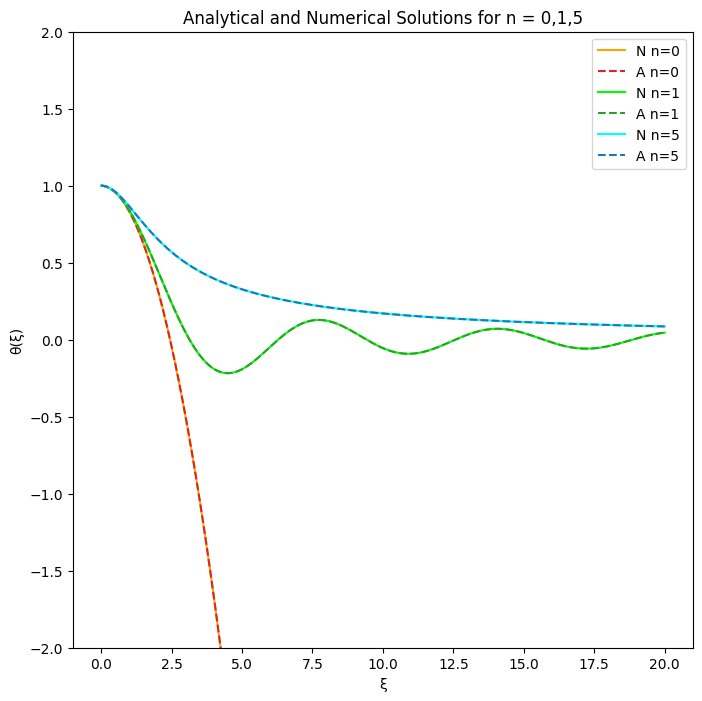

In [19]:
def LE0 (xi): return 1.0 - 1.0/6.0 * xi*xi
def LE1 (xi): return np.sin(xi)/xi
def LE5 (xi): return 1.0/np.sqrt(1.0+(xi*xi)/3.0)

f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float")

x = np.linspace(np.min(f.T[0]), np.max(f.T[0]), 1000)

plt.figure(figsize=[8,8])
plt.title("Analytical and Numerical Solutions for n = 0,1,5")
plt.plot(f.T[0], f.T[5], label="N n=0", color="orange")
plt.plot(x, LE0(x), label="A n=0", linestyle='dashed', color="tab:red")
plt.plot(f.T[0], f.T[7], label="N n=1", color="lime")
plt.plot(x, LE1(x), label="A n=1", linestyle='dashed', color="tab:green")
plt.plot(f.T[0], f.T[15], label="N n=5", color="cyan")
plt.plot(x, LE5(x), label="A n=5", linestyle='dashed', color="tab:blue")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.ylim(-2,2)
plt.legend()
plt.show()

### White Dwarf

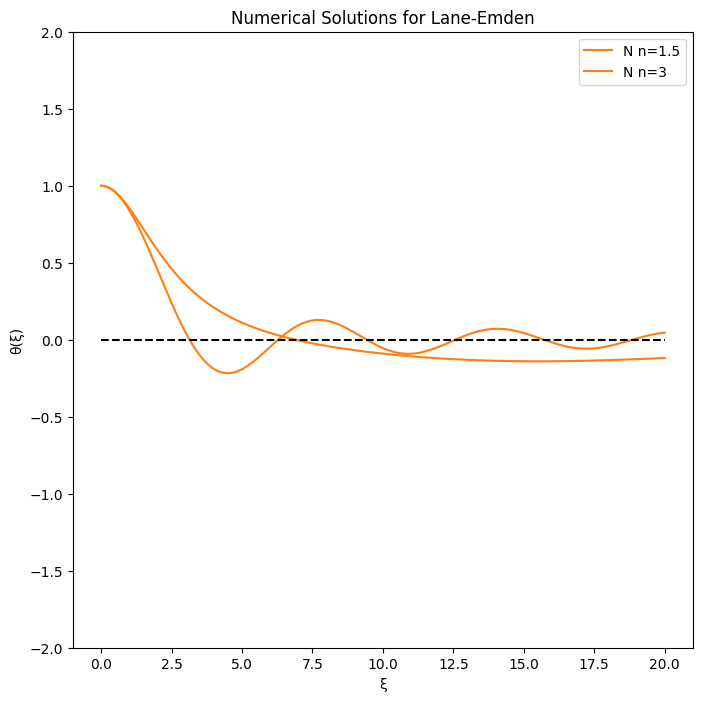

In [20]:
f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float")

x = np.linspace(np.min(f.T[0]), np.max(f.T[0]), 1000)

plt.figure(figsize=[8,8])
plt.title("Numerical Solutions for Lane-Emden")
plt.plot(f.T[0], f.T[8], label="N n=1.5", color="tab:orange")
plt.plot(f.T[0], f.T[11], label="N n=3", color="tab:orange")
plt.plot(x,x*0, color="black", linestyle="dashed")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.ylim(-2,2)
plt.legend()
plt.show()

### Numerical Arbitrary n

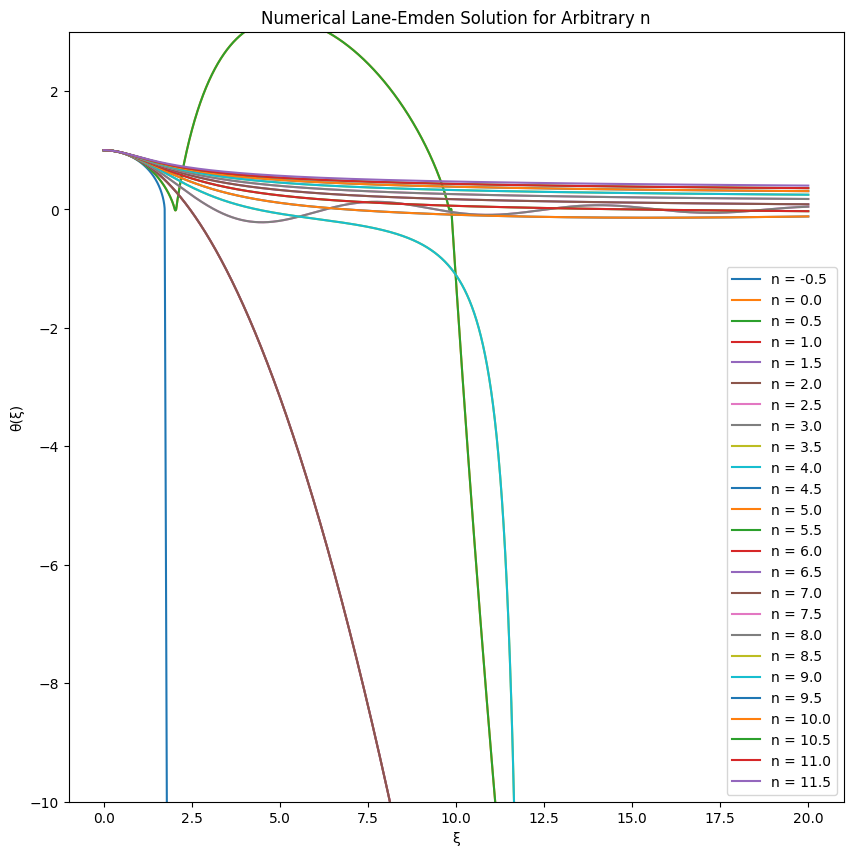

In [21]:
f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float")

plt.figure(figsize=[10,10])
plt.title("Numerical Lane-Emden Solution for Arbitrary n")
for i in range(1, len(f.T)):
    plt.plot(f.T[0], f.T[i], label=f'n = { (i - 2)*0.5}')
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.ylim(-10, 3)
plt.legend()
plt.show()

# -------------- Constant Density

### Lane-Emden Numerical and Analytical vs Tolman-Oppenheimer-Volkoff Numerical and Analytical

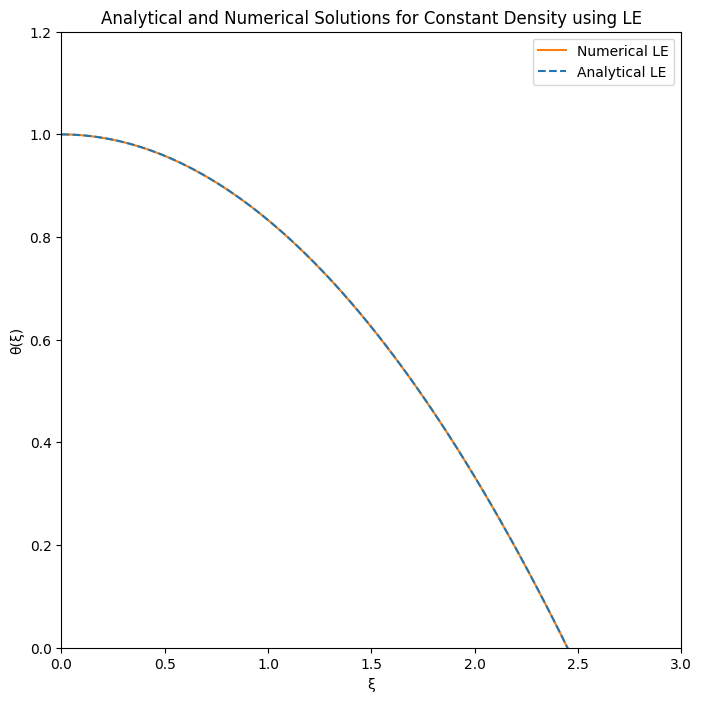

In [22]:
def LE0 (xi): return 1.0 - 1.0/6.0 * xi*xi

f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float")

x = np.linspace(np.min(f.T[0]), np.max(f.T[0]), 1000)

plt.figure(figsize=[8,8])
plt.title("Analytical and Numerical Solutions for Constant Density using LE")
plt.plot(f.T[0], f.T[5], label="Numerical LE", color="tab:orange")
plt.plot(x, LE0(x), label="Analytical LE", linestyle='dashed', color="tab:blue")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.xlim(0,3)
plt.ylim(0,1.2)
plt.legend()
plt.show()

In [23]:

def TOV_const_rho(xi): return xi*0

g = np.loadtxt("./output/TOVconstantdensity.csv", delimiter=",", dtype="float")

x = np.linspace(np.min(g.T[0]), np.max(g.T[0]), 1000)

plt.figure(figsize=[8,8])
plt.title("Analytical and Numerical Solutions for Constant Density using TOV")
plt.plot(g.T[0], g.T[1], label="Numerical TOV", color="tab:green")
plt.plot(x, TOV_const_rho(x), label="Analytical TOV", linestyle='dashed', color="tab:red")
plt.xlabel("r")
plt.ylabel("P(r)")
plt.legend()
plt.show()

FileNotFoundError: ./output/TOVconstantdensity.csv not found.

# -------------- White Dwarf

## Mass-Radius Plot for Various Central Densities/Pressures

### Non-Relativistic; Lane-Emden vs Tolman-Oppenheimer-Volkoff

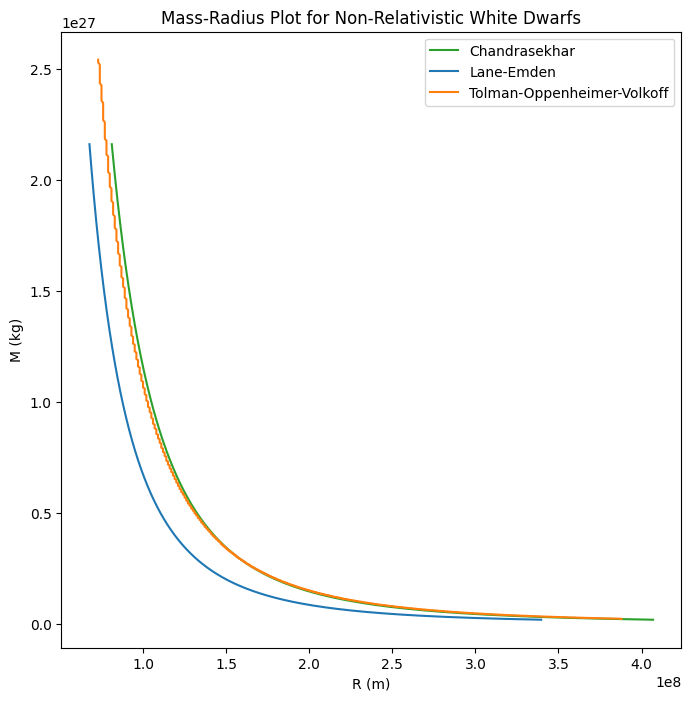

In [24]:
f = np.loadtxt("./output/LEmassRadius_wd_non_r.csv", delimiter=",", dtype="float") # LE solution
j = np.loadtxt("./output/OLDLE.csv", delimiter=",", dtype="float") # LE solution OLD slightly different to new one
g = np.loadtxt("./output/TOVmassRadius_wd_non_r.csv", delimiter=",", dtype="float") # TOV solution

# Get Chandrasekhar prediction
M_sun = 1.98847e30
R_sun = 6.957e8
mu_e = 2

y = np.linspace(min(f.T[0]), max(f.T[0]), 1000)  # mass in kg

x = (
    0.012
    * (y / M_sun)**(-1/3)
    * (mu_e / 2)**(-5/3)
) * R_sun

plt.figure(figsize=[8,8])
plt.title("Mass-Radius Plot for Non-Relativistic White Dwarfs")
plt.plot(x, y, label="Chandrasekhar", color="tab:green")
# plt.plot(j.T[1], j.T[0], label="Lane-Emden OLD", color="tab:red", linestyle="dashed")
plt.plot(f.T[1], f.T[0], label="Lane-Emden", color="tab:blue")
plt.plot(g.T[1], g.T[0], label="Tolman-Oppenheimer-Volkoff", color="tab:orange")
plt.xlabel("R (m)")
plt.ylabel("M (kg)")
plt.legend()
plt.show()

### Relativistic; Lane-Emden vs Tolman-Oppenheimer-Volkoff

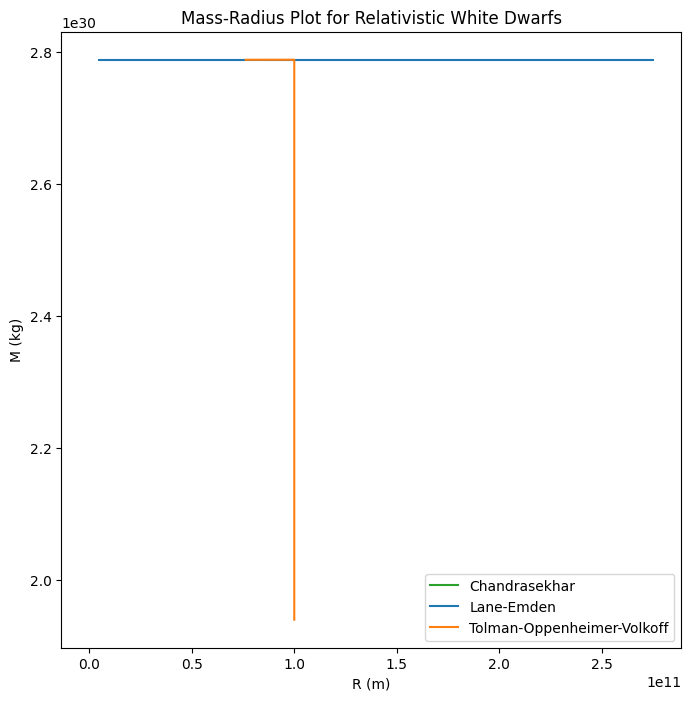

In [25]:
f = np.loadtxt("./output/LEmassRadius_wd_r.csv", delimiter=",", dtype="float") # LE solution
g = np.loadtxt("./output/TOVmassRadius_wd_r.csv", delimiter=",", dtype="float") # TOV solution

# Get Chandrasekhar prediction
M_sun = 1.98847e30
R_sun = 6.957e8
mu_e = 2

y = np.linspace(min(f.T[0]), max(f.T[0]), 1000)  # mass in kg

x = (
    0.012
    * (y / M_sun)**(-1/3)
    * (mu_e / 2)**(-5/3)
) * R_sun

plt.figure(figsize=[8,8])
plt.title("Mass-Radius Plot for Relativistic White Dwarfs")
plt.plot(x, y, label="Chandrasekhar", color="tab:green")
plt.plot(f.T[1], f.T[0], label="Lane-Emden", color="tab:blue")
plt.plot(g.T[1], g.T[0], label="Tolman-Oppenheimer-Volkoff", color="tab:orange")
plt.xlabel("R (m)")
plt.ylabel("M (kg)")
plt.legend()
plt.show()

## Density/Pressure(Radius) Plot for Single Central Density/Pressure

### Non-Relativistic; Lane-Emden vs Tolman-Oppenheimer-Volkoff

In [26]:
f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float") # LE solution
g = np.loadtxt("./output/Pr_TOV_wd_non_r.csv", delimiter=",", dtype="float") # TOV solution

plt.figure(figsize=[8,8])
plt.title("Mass-Radius Plot for Relativistic White Dwarfs")
plt.plot(f.T[0], f.T[8], label="Lane-Emden", color="tab:blue")
plt.plot(g.T[1], g.T[0], label="Tolman-Oppenheimer-Volkoff", color="tab:orange")
plt.xlabel("Radial")
plt.ylabel("Density/Pressure")
plt.legend()
plt.show()

FileNotFoundError: ./output/Pr_TOV_wd_non_r.csv not found.

### Relativistic; Lane-Emden vs Tolman-Oppenheimer-Volkoff

In [27]:
f = np.loadtxt("./output/laneEmdenSolutions.csv", delimiter=",", dtype="float") # LE solution
g = np.loadtxt("./output/Pr_TOV_wd_r.csv", delimiter=",", dtype="float") # TOV solution

plt.figure(figsize=[8,8])
plt.title("Mass-Radius Plot for Relativistic White Dwarfs")
plt.plot(f.T[0], f.T[11], label="Lane-Emden", color="tab:blue")
plt.plot(g.T[1], g.T[0], label="Tolman-Oppenheimer-Volkoff", color="tab:orange")
plt.xlabel("Radial")
plt.ylabel("Density/Pressure")
plt.legend()
plt.show()

FileNotFoundError: ./output/Pr_TOV_wd_r.csv not found.

# -------------- Convergence

## For TOV Constant Density

### Convergence to Analytical Solution RK1 vs RK4 vs RK6 with Itterations

### Convergence to Analytical Solution RK1 vs RK4 vs RK6 with Time

# -------------- Other Equations of State

## NPS

## SLy4